# 数値計算が専門でない理系向けのJulia入門

- 2020/12/21 富谷昭夫(akio.tomiya_AT_riken.jp)　http://www2.yukawa.kyoto-u.ac.jp/~akio.tomiya/

julia version 1.5.1 on MAC os 10.14.6 で動作確認。

## なぜ書いた？

1. 共同研究者がJulia をやりたいと言ったので。
2. ミニマムのレビューがあってもいいかなということで。
3. 備忘録。

## だれ？

機械学習を素粒子理論物理に使いたい人。詳細は http://www2.yukawa.kyoto-u.ac.jp/~akio.tomiya/aboutme.html など。

Twitter: https://twitter.com/TomiyaAkio

Zenn: https://zenn.dev/akio_tomiya

書いた本: 
https://www.amazon.co.jp/s?i=stripbooks&rh=p_27%3A%E5%AF%8C%E8%B0%B7+%E6%98%AD%E5%A4%AB&s=relevancerank&text=%E5%AF%8C%E8%B0%B7+%E6%98%AD%E5%A4%AB&ref=dp_byline_sr_book_17

### なぜ理系向け？

計算の例や用語として理系向けだと思われる。

数値計算は大学の講義で耳にしたことあるくらいの知識を仮定する。

### 参考になる文献など

1. 1からわかるJulia https://www.amazon.co.jp/dp/433902905X/ref=cm_sw_r_tw_dp_x_3Tm4FbKJC2XKT 電子版あり
2. 永井佑紀さんのQiita https://qiita.com/cometscome_phys
3. 黒木玄さんのツイッター https://twitter.com/genkuroki

この他、公式サイトやオライリーの本もある。またYoutube に多数の動画もある。
バージョン1より前と後で異なることがあるので、バージョンは要確認。

<font color="red">書いていないことも多数あるが、それらが重要でないわけでない。またそれらは上の参考文献などで補って欲しい。</font>

## Julia とは？

なぜ僕らはJuliaを作ったか（翻訳）https://marui.hatenablog.com/entry/20120221/1329823079

    僕らが欲しい言語はこんな感じだ。まず、ゆるいライセンスのオープンソースで、Cの速度とRubyの動的さが欲しい。Lispのような真のマクロが使える同図象性のある言語で、Matlabのように分かりやすい数学の記述をしたい。Pythonのように汎用的に使いたいし、Rの統計処理、Perlの文字列処理、Matlabの線形代数計算も要る。シェルのように簡単にいくつかのパーツをつなぎ合わせたい。チョー簡単に習えて、超上級ハッカーも満足する言語。インタラクティブに使えて、かつコンパイルできる言語が欲しい。
    (中略)
    僕らがごまかしようのないほど欲張りなのは分かってるけど、それでもぜんぶ欲しいんだ。二年半ほど前、この欲にまみれた言語を作り始めた。まだ完成してないけど、そろそろ1.0のリリースの時期だ。僕らが作った言語の名前はJulia。すでに僕らの無礼な要求に9割方は応えてくれてるけど、ちゃんとした形になるためには僕ら以外の要求も聞かないといけない。だから、君がもし欲張りで理不尽でわがままなプログラマなら、ちょいとこいつを試してもらいたいんだ。
    
これに尽きてる。そして実際速く、2020年末現在、v1.5.3 (Nov 9, 2020)までリリースされている。

(参考) https://modelingguru.nasa.gov/docs/DOC-2625

## インストール

mac ならhomebrew https://brew.sh/index_ja からインストールできる。homebrew が使える状況なら
```shellscript
brew install --cask julia
```
とターミナルに入力すればOK。

またそれ以外のOSでも、Julia の公式サイト https://julialang.org/downloads/ から
バイナリ(実行ファイル) をダウンロードできる

実行法は3 つあり、

1. REPL (repeat-evaluate print loop)。Julia の実行ファイルを起動すると立ち上がるコマンドプロンプト。簡単な計算ならこれで
OK
2. Jupyter notebook Pythonでよく使われるJupyter でももちろんJulia を使える(Jupyter のJはJuliaのJ)。 REPL 上で ``using Pkg; Pkg.add("IJulia")`` を実行すれば使えるようになる。
3. スクリプトとして実行。パスが通っていれば、``julia 実行ファイル``とすると使える。実行後にJIT(Just-in-time)コンパイラが
走って、動作部品ごとにコンパイルが自動的に通り、実行される。

このノートでは、Jupyter notebookでの実行を念頭において説明するが、実際はどれでも良い。



## Hello world

まずは画面にhello world を出してみる。2種類の方法がある。

In [1]:
print("hello world")

hello world

In [2]:
println("hello world")

hello world


違いは、printは最後に改行が入らず、printlnは改行が入る。
println はprint line のことらしい。

変数の表示も簡単にできる。

In [3]:
a = 12
println("変数=$a")

変数=12


また、print内で計算もできる。

In [4]:
a = 12
println("変数=$(a/2)")

変数=6.0


演算で他のプログラミング言語と大きく違うところは巾乗を\^2 と書くところ、また円周率をπとかける。
たとえば半径2の円の面積を$A$とすると、

In [5]:
A = π*2^2
println("面積=$A")

面積=12.566370614359172


とかける。ギリシャアルファベットの変数も使えるため、教科書に載っている式を書くことができる。

In [6]:
ξ=1.2
println("ξ=$ξ")

ξ=1.2


コメントは、``#``に続けてかけば、その行が改行されるまでコメントして、実行されない

In [7]:
println("1,2,3") #実行される
#println("4,5,6") #実行されない
println("7,8,9") #実行される

1,2,3
7,8,9


## 配列と行列

数値計算において配列変数は必須である。配列変数は

In [8]:
a = [];

で準備できる。最後のセミコロン; はJupyter 上でJulia を使う際に出力を抑える記号で本質的な意味はないので省いても良い。
また、浮動小数など型を指定したい場合、

In [9]:
a = Float64[];

とすれば良い。もちろん

In [10]:
a = [4,3,2,1];
println(a)

[4, 3, 2, 1]


などとすれば、要素をいれて定義できる。
浮動小数などを指定して配列を用意するには

In [11]:
a = Float64[4,3,2,1];
println(a)

[4.0, 3.0, 2.0, 1.0]


とすれば良い。また型推定をもちいて

In [12]:
a = [1.2, 1.3, 1.4]
println(a)

[1.2, 1.3, 1.4]


と自動的に型が決まる。

さらに要素を追加したければ、
append!とpush!が使用できる。

In [13]:
a = []
append!(a,1)
append!(a,3)
append!(a,5)
println(a)

Any[1, 3, 5]


append! の!は、引数(ひきすう)の変数を変える関数であることを明示的にするためにつけるものである。

append!の他にpush!もあるが、配列を追加する時の動作が下記のように少し異なる。

In [14]:
a=[]
append!(a,[1,2])
append!(a,[3,4])
println(a)

Any[1, 2, 3, 4]


In [15]:
a=[]
push!(a,[1,2])
push!(a,[3,4])
println(a)

Any[[1, 2], [3, 4]]


行列は、以下のように作れる。

In [16]:
M = Float64[
     1 2
     3 4
]

2×2 Array{Float64,2}:
 1.0  2.0
 3.0  4.0

型指定しない作り方もできて、型推定を使うなら、

In [17]:
M = [
     1.0 2.0
     3.0 4.0
    ]

2×2 Array{Float64,2}:
 1.0  2.0
 3.0  4.0

としても良い。

行列とベクトル積は、次のようにできる。
ベクトルは単に配列として用意して、
掛け算をおこなえば良い。

In [18]:
M = [
     0.0 3.0
     3.0 0.0
    ]
v = [1.0, 2.0]
println(M*v)

[6.0, 3.0]


ベクトル同士の演算として下記のものがある。

In [19]:
v = [1.0, 2.0]
println(v*v')
println(v'*v)

[1.0 2.0; 2.0 4.0]
5.0


ここで'は共役を取る操作を表す。
つまりベクトルと共役ベクトルの積は行列(2階のテンソル)となり、
共役ベクトルとベクトルの積は数(つまり内積)となる。

このノートでは出てこないが、複素数配列、行列を扱うには、``ComplexF64[]`` を使えば良い。また虚数単位は、``im``である。

配列や行列の要素にアクセスするには、\[数\]を変数のあとにつければいいが、
インデックスは1から始まることに注意。

In [20]:
a = [2,4,6,8]
println("$(a[1]), $(a[2])")

2, 4


## 処理順序を変える (if, for, function)


ここではプログラムの処理順序を制御する3つの機能if、for、functionを紹介する。

### if

if を使うと、変数の内容によってプログラムの処理を変えることができる、
たとえば、変数``a``の偶奇を判別するには、

In [21]:
a = 2
if a%2==0
    println("$a は偶数")
else
    println("$a は奇数")
end

2 は偶数


とできる。``%``は、あまりを求める演算子。

また、``else`` は省略できるがifブロックは、``if`` ... ``end`` のようにend で終わる必要がある。

### for

繰り返し処理はfor でかける。

In [22]:
for i=1:3
    println("繰り返し処理 i=$i 番目")
end

繰り返し処理 i=1 番目
繰り返し処理 i=2 番目
繰り返し処理 i=3 番目


こちらも``end``が必要である。
Python と同じ形のfor (他言語のforeach)もできて、

In [23]:
li = [1,2,3]
for el in li
    println(el)
end

1
2
3


である。

### function

複数の処理をまとめておいたり、共通化するには、
``function``を使えば良い。これはpython の``def ``である。

たとえば2乗を計算する関数は、

In [24]:
function square(x)
    y=x^2
    return y
end
println("1^2 = $(square(1))")
println("2^2 = $(square(2))")

1^2 = 1
2^2 = 4


とできる。これはJulia のコードの高速化のテクニックであるが、
トップレベル(functionなどで囲まれていない部分)での処理は避けて、functionでくるむというのがよい。

下記は実行速度の比較である。

In [25]:
Nrepeat=10^7*2
A = collect(1:100) #1から1000までを配列として代入。 
@time begin
    for i=1:Nrepeat
        K = sum(A)
    end
end
function calc_sum(A)
    for i=1:Nrepeat
        K = sum(A)
    end
end
#
@time calc_sum(A)

  2.023704 seconds (80.00 M allocations: 1.490 GiB, 11.72% gc time)
  1.551242 seconds (60.00 M allocations: 1.192 GiB, 11.71% gc time)


上から順に、トップレベルの処理(をbegin-endブロックで囲んだもの)、function で包んだ和である。

今の例だと差は僅かであるが、本格的な計算の場合には差はより拡大する。
Julia のプログラムの書き方として、

1. とりあえずトップレベルに書く
2. function でくるみ、直後に呼び出す形にする。
3. 型指定をする。さらに関数内で型が変わらないように工夫する。

という順番があり得る。もちろん2までで十分な場合もある。

またグローバル変数はなるべく避ける。グローバルな定数を使う場合には``const a=1``などとして、値が変わらないことを明示すべきである。

``@time``は、ブロックでの実行時間を調べてくれるマクロである。
この他にも色々マクロがある。

## プロット

ここでは、PyPlotを使って作図をする。これは、python でのmatplotlib.pyplot を内部で使うものである。
Julia にも``Plots.jl``と呼ばれる作図用のライブラリがあるが、
現在までのところではPyPlot のほうが見栄えが良いように思う。

<font color="red">
もしmac をつかってて、``julia ファイル`` とする場合には、事前に
    
```
export MPLBACKEND=qt5agg
```

と行っておくこと。
</font>

In [26]:
using PyPlot: plt

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/akio/.julia/packages/PyPlot/XHEG0/src/init.jl:192


ここで、``using`` はライブラリを呼び出す命令である。 ここで``using HOGE: fuga `` とすると、HOGE モジュールからfuga だけエクポートする。
もし、``using PyPlot`` とするなら以下のコードで``plt.``の部分が省略できる。

Ref. [Juliaのusingとimportについて](https://qiita.com/cometscome_phys/items/5c98aef4c10a8a575f81)

Ref. [The Comprehensive Julia Tutorial - 6 - Modules
](https://www.youtube.com/watch?v=-0lBmYanICo&feature=emb_title)

Ref. [Using vs import](https://towardsdatascience.com/how-to-use-modules-in-julia-a27e31974b9c)

例として``sin(x)``のプロットをしてみよう。

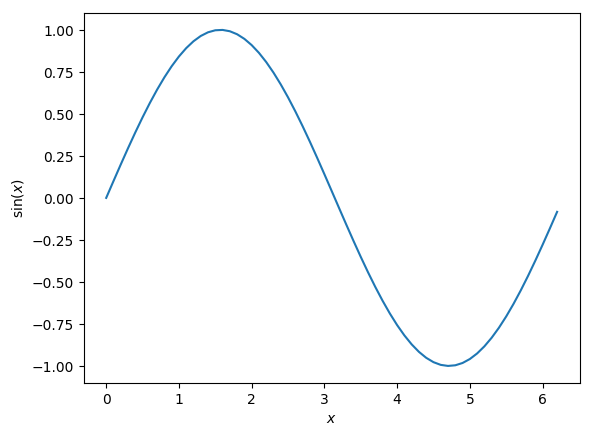

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [27]:
x=collect(0:0.1:2π) # 0から2πまで0.1刻みの変数を用意する。
y=sin.(x) # sinをxの各要素に作用させる。
plt.plot(x,y)
plt.xlabel(raw"$x$")
plt.ylabel(raw"$\sin(x)$") #LaTeX 記法を使うため、raw をつける。
plt.show()

ここで、1行目のcollect は、配列をつくる関数、``:``が3つ並んだものは、スタート:ステップ:最終値という形で指定できる、数列をつくる機能である。
2行目のsin.(x)の.は、各要素に作用させるという意味で、Puthonでいうところのユニバーサル関数である。

エラーバー付きのプロットも、python と同様に、

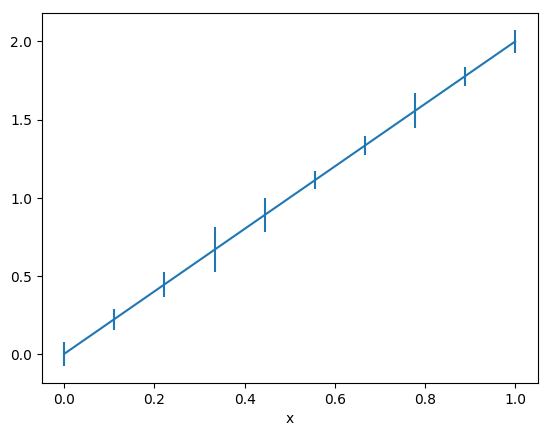

In [28]:
Ndata = 10
x=range(0,1,length=Ndata)
y=2*x
e=rand(Float64,Ndata)/10 .+ 0.05 # ".+" 演算子は各要素に加算を行う。
#
plt.errorbar(x,y,yerr=e)
plt.xlabel("x")
plt.show()

とできる。ここで``rand()``は0から1の乱数をつくる関数であり、型と要素数を指定して使用できる。
また引数無しで実行すると1つづつ乱数を生成できる。

In [29]:
for i =1:5
    r=rand()
    println("r=$r")
end

r=0.6459767076993392
r=0.8371735878590829
r=0.41782073958698884
r=0.784589662878332
r=0.6338771147422624


ヒストグラムもかける。

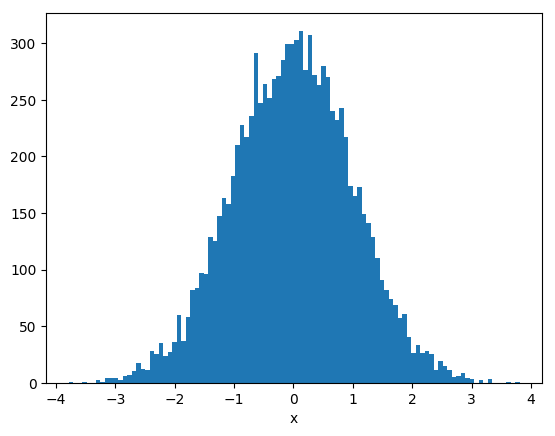

In [30]:
x=randn(10000)
plt.hist(x,bins=100)
plt.xlabel("x")
plt.show()

ここで``randn()``は正規分布に従う乱数を生成する関数である。

## Numpyをつかう

ここでは、Pythonのライブラリをつかう``PyCall``の例としてNumpy をよびだしてみる。

Pycall のインストール等は、https://qiita.com/yatra9/items/0a1a9a5ba19e9efe08c0 を参照。

In [31]:
using PyCall
np=pyimport("numpy");

このようにすると、Python と同じように``np.hoge``などとするとnumpy の機能を使える。

たとえば、数列をつくる``linspace ``をつかうなら、

In [32]:
np.linspace(0,1,5)

5-element Array{Float64,1}:
 0.0
 0.25
 0.5
 0.75
 1.0

とすれば良い。また``np.loadtxt``などもつかえるため、``numpy``の高機能なload, save をつかうことができる。

# 簡単な数値計算

以下では、簡単な数値計算の実例として、微分方程式を解くオイラー法、そして積分をする手法であるモンテカルロ積分を紹介する。

## オイラー法

オイラー法とは、微分方程式

$$
\frac{dx(t)}{dt} = \cdots
$$

などを解く、簡単(だが精度の悪い)手法である。この他にルンゲクッタ法やシンプレクティック積分法などがあるが割愛する。

オイラー法は、上の微分方程式の左辺を離散化し、

$$
\frac{x(t+h)-x(t)}{h} = \cdots
$$

とし、hを両辺にかけて、

$$
x(t+h)-x(t) = (\cdots)\times h
$$

そして$x(t+h)$についてといて　

$$
x(t+h) = x(t) + (\cdots)\times h
$$

として、小さい$h$ずつ$x$を進めて求めていく手法である。

ここでは、


$$
\frac{dx}{dt} = -4(t-1)x
$$

を$x(t)$について解く。
初期条件は、$t=0$で$x(t=0)=e^{-2}$とする。
積分区間は、$0<t<1$、ステップ幅は$h=0.1$とする。

ここでJulia の機能の一つを導入する。
``\euler``とREPL かセルのなかに入れてJupyter でtab キーをおすと
``ℯ``が入力できる。``ℯ``は``e``とは異なりネイピア数という数学定数を表す。

In [33]:
ℯ

ℯ = 2.7182818284590...

以下で実際のオイラー法を実装、実行、プロットしてみる。

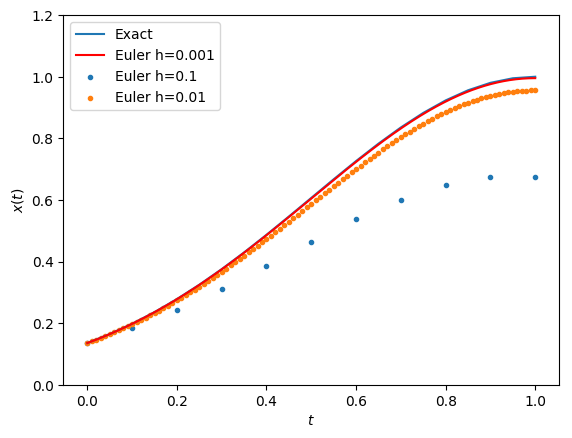

In [34]:
using PyPlot: plt #上でインポート済みであるが、単独のセルで実行できるように。

#
# Plot Exact solution
t_plot=collect(0:0.05:1)
x_plot=ℯ.^(-2*(t_plot.-1).^2)
plt.plot(t_plot,x_plot,label="Exact")
#
function eular_method(x_init,tmin,tmax;h,line) #引数内のセミコロン; はキーワード引数と呼ばれる機能で変数名をキーワードに指定して関数を定義できる。
    Nmax = Int((tmax-tmin)/h) # Int(...) とすると整数型に型をキャストできる。
    x = x_init
    t_plot=Float64[0.0]
    x_plot=Float64[x]
    for it=1:Nmax
        t=tmin+it*h
        x=x-4.0*(t-1.0)*x*h
        append!(t_plot,t)
        append!(x_plot,x)
    end
    if line
        plt.plot(t_plot,x_plot,label="Euler h=$h",color="red")
    else
        plt.scatter(t_plot,x_plot,label="Euler h=$h",marker=".")
    end
end
eular_method(ℯ^(-2),0.0,1.0,h=0.1,line=false)
eular_method(ℯ^(-2),0.0,1.0,h=0.01,line=false)
eular_method(ℯ^(-2),0.0,1.0,h=0.001,line=true)
#
plt.ylabel(raw"$x(t)$") 
plt.xlabel(raw"$t$") 
plt.legend() # ラベルを表示
plt.ylim(0,1.2) # ラベルを表示
plt.show()

## モンテカルロ積分

ここでは、モンテカルロ積分を行って、円周率の近似値を求める。

以下の方法は、半径1の円の第一象限の面積と第一象限にある1辺の長さが1の正方形の面積比が$π/4$になることに基づいている。

モンテカルロ法の誤差は試行回数$N$とし時に一般に$O(1/\sqrt{N})$となるため、誤差は比較的大きい。

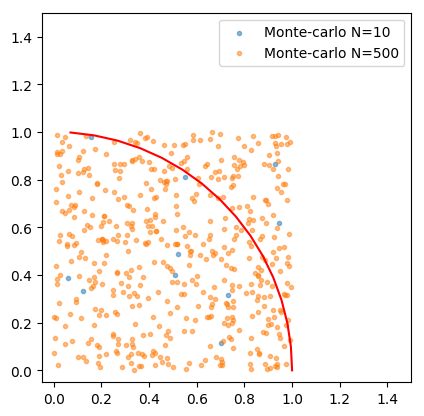

pi10=3.2
pi500=3.136
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [35]:
using PyPlot: plt #上でインポート済みであるが、単独のセルで実行できるように。

function montecarlo_pi(Nmax=10) #引数内の=は、デフォルト引数と呼ばれる。何も指定しないときに自動的に使われる。
    cnt = 0
    x_plot=[]
    y_plot=[]
    for i=1:Nmax
        x=rand()
        y=rand()
        if x^2+y^2 < 1
            cnt+=1
        end
        append!(x_plot,x)
        append!(y_plot,y)
    end
    plt.scatter(x_plot,y_plot,label="Monte-carlo N=$Nmax",marker=".",alpha=0.5)
    return cnt/Nmax*4 # pi = 4*(pi/4)
end
pi10=montecarlo_pi()
println("pi10=$pi10")
pi500=montecarlo_pi(500)
println("pi500=$pi500")
#=
pi10000=montecarlo_pi(10000)
println("pi10000=$pi10000")
=#
#
θ = collect(0:0.1:π/2)
x_plot = cos.(θ)
y_plot = sin.(θ)
plt.plot(x_plot,y_plot,color="red")
#
plt.axes().set_aspect("equal")
plt.xlim(-0.05,1.5)
plt.ylim(-0.05,1.5)
plt.legend() # ラベルを表示
plt.show()

ここで、
```
#=
...
=#
```
は数行に渡るコメントアウトを意味する。

## 線形代数

詳細は触れないが、線形代数の演算も可能である。その際には、
LinearAlgebra をロードする。

In [36]:
using LinearAlgebra

代表的なものは下記の通り。

In [37]:
# トレース
A = [
    1 0
    0 2
]
println("tr(A)=$(tr(A))")

tr(A)=3


In [38]:
# 逆行列
A = [
    1 0
    0 2
]
println("inv(A)=$(inv(A))")

inv(A)=[1.0 0.0; 0.0 0.5]


In [39]:
# デターミナント(行列式)
A = [
    1 0
    0 2
]
println("det(A)=$(det(A))")

det(A)=2.0
